# Exploratory Data Analysis (EDA)

### Importing the libraries 

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics  # for model building 
from sklearn.model_selection import train_test_split #splitting the data into test and train

%matplotlib inline 

# %matplotlib notebook
sns.set_style("whitegrid")

In [132]:
df = pd.read_csv("dataset.csv")   # reading the datafile

Performing some basic operations after reading the dataset. Like, checking the number of rows & cols, nature of rows and cols etc...

In [4]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [5]:
df.shape

(21613, 21)

In [144]:
df = df.drop_duplicates(keep='first')  #to check whether there are any duplicated in the dataset

In [146]:
df.isnull().sum() #to check if there are any null values in the dataset 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [147]:
df.describe() # get the detail view of all the attributes

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.6+ MB


 __Here we can drop the ID col only(not of any use while building the model), as the other cols as of now are important and as well there are no any missing values in the other cols__

In [10]:
df.drop('id',axis=1,inplace=True) # deleting the ID cols as it will not contribute to the model. 

In [11]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
df['waterfront'].value_counts()   # checking the number of datapoints inside that category of the attribute 

0    21450
1      163
Name: waterfront, dtype: int64

In [15]:
(df.groupby('view').sqft_living.agg(['count','min','max','mean']))  #grouping the attribute to check the mean values corresponding to each group 

,count,min,max,mean
view,,,,
0,19489,290,9200,1997.761660
1,332,570,6300,2568.960843
2,963,470,10040,2655.257529
3,510,440,12050,3018.564706
4,319,680,13540,3351.473354


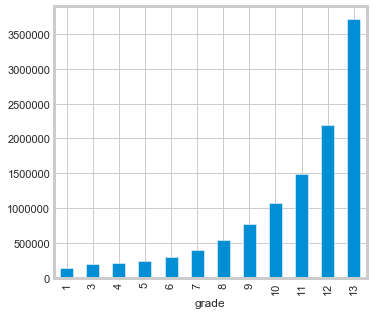

In [217]:
plt.figure(figsize=(5,5)) # defining the size of the plot 
df.groupby('grade').price.mean().plot(kind = 'bar')   #exploring the groupby as plot 

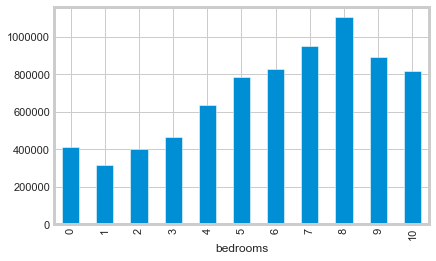

In [218]:
df.groupby('bedrooms').price.mean().plot(kind = 'bar') #checking with all the categorical attributes, how they are distributed towards the target variable 

### Checking the outliers, which we can do by visualising the data in the various plots and also by defining a function

Detecting by the method of box-plot

In [19]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

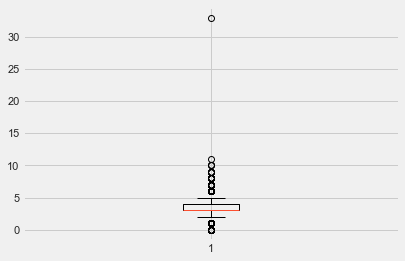

In [150]:
y = list(df.bedrooms) 
plt.boxplot(y) 
plt.show() 

Defining a Function to check what all are the outliers for the dataset given.  **(IQR method)**

In [151]:
def outlier(x):
    q1,q3 = np.percentile(x,[25,75])
    iqr = (q3 - q1)
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    return np.where((x > upper_bound) | ( x < lower_bound))

In [153]:
#Here we will get all the values that are below the lower bound and above the upper bound
outlier(df.bedrooms)

(array([  154,   209,   232,   239,   264,   331,   350,   465,   486,
          527,   556,   558,   648,   717,   718,   784,   833,   860,
          875,   903,  1066,  1135,  1149,  1162,  1163,  1195,  1228,
         1241,  1266,  1306,  1315,  1378,  1389,  1413,  1457,  1478,
         1503,  1535,  1539,  1595,  1629,  1653,  1660,  1674,  1712,
         1718,  1734,  1752,  1882,  1931,  1956,  1971,  1975,  1986,
         2008,  2026,  2031,  2070,  2074,  2156,  2306,  2310,  2345,
         2366,  2382,  2411,  2496,  2497,  2516,  2567,  2629,  2653,
         2668,  2671,  2687,  2709,  2727,  2825,  2852,  2906,  2927,
         2930,  2973,  3042,  3079,  3108,  3119,  3152,  3223,  3235,
         3253,  3285,  3303,  3338,  3383,  3467,  3489,  3523,  3540,
         3541,  3582,  3602,  3613,  3648,  3661,  3720,  3721,  3725,
         3745,  3776,  3805,  3837,  3874,  3925,  3936,  3984,  3987,
         4024,  4035,  4067,  4089,  4096,  4107,  4146,  4197,  4235,
      

In [162]:
df.sort_values(by='bedrooms',ascending=False).head()  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15161,5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
19254,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745
13314,627300145,20140814T000000,1148000.0,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
4235,2902200015,20150106T000000,700000.0,9,3.00,3680,4400,2.0,0,0,...,7,2830,850,1908,0,98102,47.6374,-122.324,1960,2450
16844,8823900290,20150317T000000,1400000.0,9,4.00,4620,5508,2.5,0,0,...,11,3870,750,1915,0,98105,47.6684,-122.309,2710,4320


Here, for the bedroom col we can see that some of the rows has the value for the count of 33 bedrooms which is a outlier for this dataset as it is disturbing the other values so for now, we can delete the 2 rows for the bedroom with the count 33 and 11.  

In [159]:
df.drop(df.index[15870],inplace=True)

In [161]:
df.drop(df.index[8757],inplace=True)

#### Let's check the distribution of all the attributes in the dataset

In [163]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

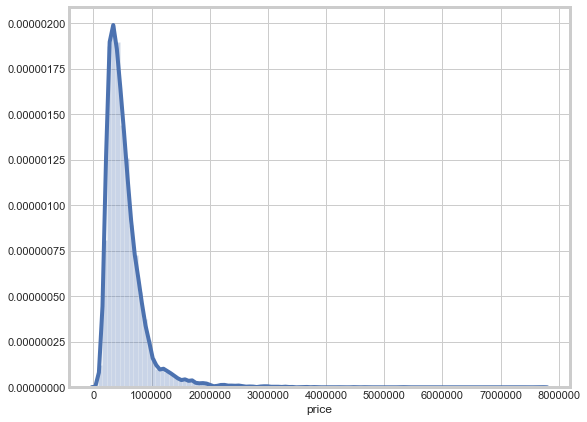

In [219]:
plt.figure(figsize=(8,7 ))
sns.distplot((df['price']), color='b', bins=100, hist_kws={'alpha': 0.3}) 
plt.show()

The above plotted hist for **"price"** is much skewed to the left  side, and for the model to be built we must **normalise** the data.

    Checking the distribution for all the other attributes (continious)

In [165]:
list(set(df.dtypes.tolist()))
for i in df.columns:
    print(df[i].dtype)
print(len(df.columns))

# here we can drop the date col as it will not show up in the plot being a object attribute,for now and try to check the distribution of all the other attributes 

int64
object
float64
int64
float64
int64
int64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
float64
int64
int64
21


In [169]:
df_num = df.select_dtypes(include=['float64','int64'])
df_num.drop('id',axis=1,inplace=True)
df_num.head()

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C967678E48>,
      dtype=object)

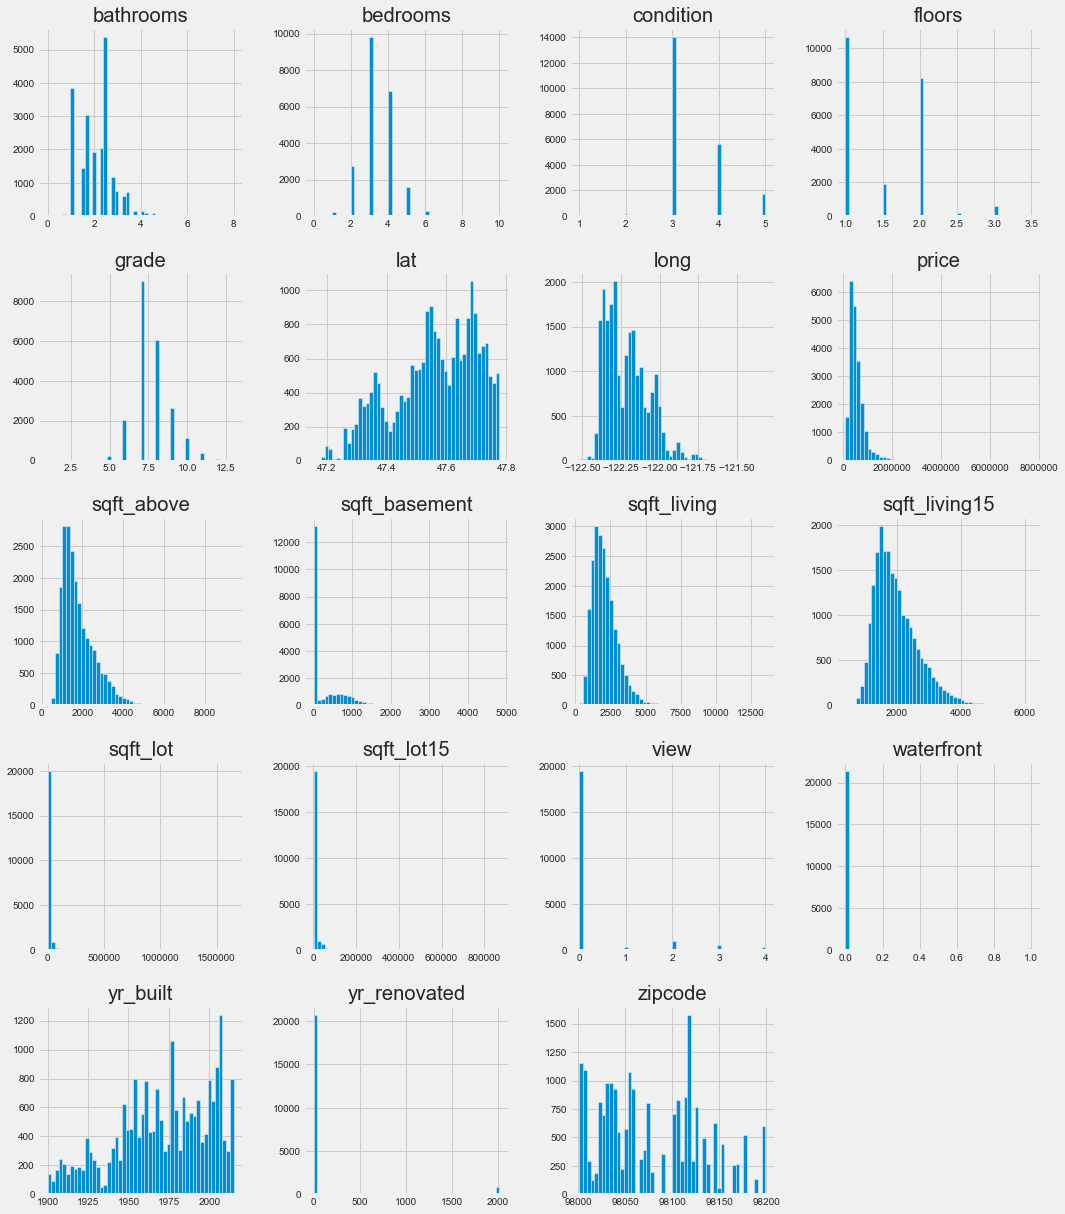

In [170]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=10, ylabelsize=10) 

### Checking the correlation between the attributes in the dataset 

In [171]:
cmat  = df_num.corr()
cmat 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.315983,0.525166,0.702066,0.089663,0.256818,0.266371,0.397299,0.036335,0.667451,0.605601,0.323817,0.054022,0.126515,-0.053208,0.306998,0.021635,0.585412,0.082451
bedrooms,0.315983,1.000000,0.529594,0.592060,0.032956,0.181020,-0.006588,0.082183,0.025765,0.367323,0.491122,0.309729,0.160143,0.017802,-0.157555,-0.010547,0.134518,0.403613,0.030564
bathrooms,0.525166,0.529594,1.000000,0.754650,0.087751,0.500621,0.063749,0.187754,-0.124918,0.665033,0.685329,0.283763,0.506162,0.050509,-0.203894,0.024596,0.223097,0.568699,0.087188
sqft_living,0.702066,0.592060,0.754650,1.000000,0.172837,0.353909,0.103823,0.284628,-0.058677,0.762751,0.876594,0.435048,0.318152,0.055168,-0.199452,0.052555,0.240270,0.756486,0.183298
sqft_lot,0.089663,0.032956,0.087751,0.172837,1.000000,-0.005200,0.021602,0.074704,-0.008942,0.113611,0.183518,0.015301,0.053057,0.007699,-0.129566,-0.085676,0.229511,0.144595,0.718555
floors,0.256818,0.181020,0.500621,0.353909,-0.005200,1.000000,0.023699,0.029445,-0.263686,0.458208,0.523852,-0.245722,0.489427,0.006126,-0.059127,0.049657,0.125440,0.279902,-0.011270
waterfront,0.266371,-0.006588,0.063749,0.103823,0.021602,0.023699,1.000000,0.401857,0.016663,0.082772,0.072076,0.080595,-0.026174,0.092952,0.030289,-0.014270,-0.041920,0.086459,0.030701
view,0.397299,0.082183,0.187754,0.284628,0.074704,0.029445,0.401857,1.000000,0.046022,0.251309,0.167653,0.276973,-0.053482,0.104037,0.084842,0.006170,-0.078430,0.280425,0.072567
condition,0.036335,0.025765,-0.124918,-0.058677,-0.008942,-0.263686,0.016663,0.046022,1.000000,-0.144650,-0.158118,0.174081,-0.361463,-0.060496,0.002988,-0.015049,-0.106457,-0.092757,-0.003381
grade,0.667451,0.367323,0.665033,0.762751,0.113611,0.458208,0.082772,0.251309,-0.144650,1.000000,0.755953,0.168433,0.446942,0.014540,-0.184841,0.114111,0.198334,0.713193,0.119235


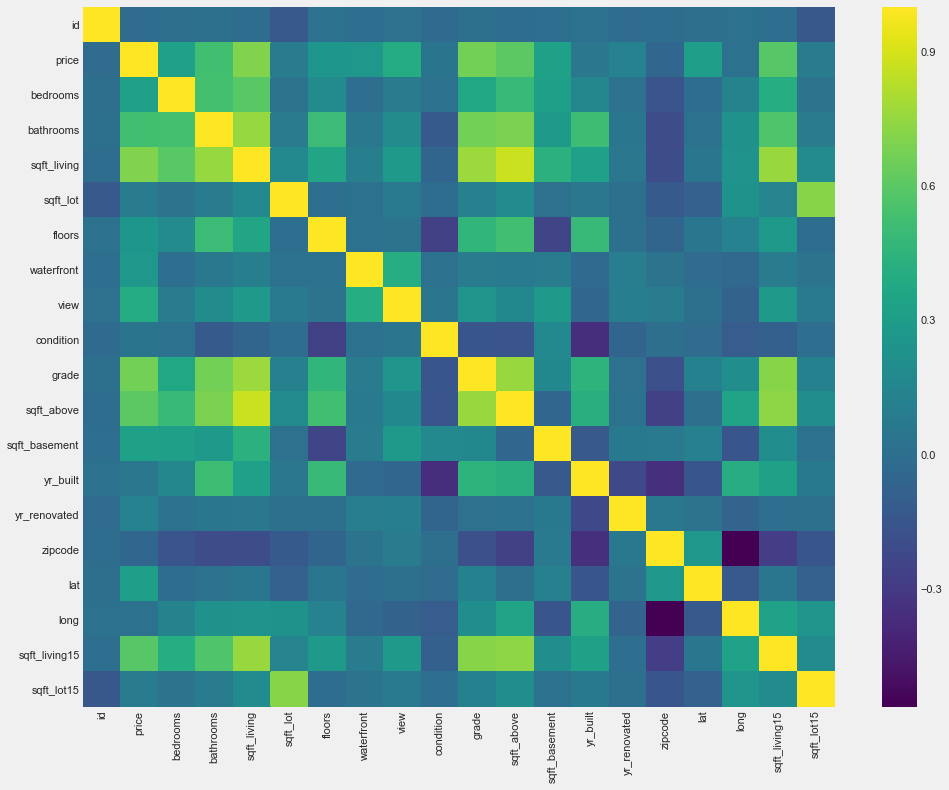

In [172]:
plt.subplots(figsize=(15,12))
sns.heatmap(df.corr(),cmap='viridis')

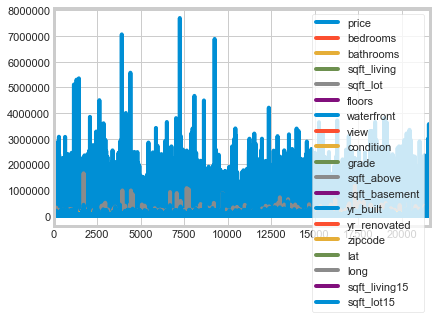

In [220]:
df_num.plot()

In [173]:
cols = cmat.nlargest(7, 'price')['price'].index
print(cols)
cm = np.corrcoef(df_num[cols].values.T)

Index(['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view'],
      dtype='object')


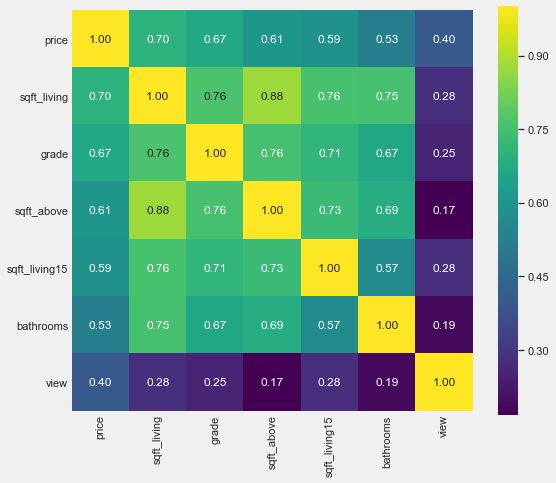

In [174]:
plt.subplots(figsize=(8,7))
sns.set(font_scale=1)
#checking for the largest pearson values
hm = sns.heatmap(cm,cmap='viridis' ,cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [175]:
df.drop(['sqft_above','sqft_living15'],axis=1,inplace=True)

In [176]:
df.drop('date',axis=1,inplace=True)

In [41]:
# sns.regplot(df.grade,df.price)

__The reason here for dropping the cols(sqft_above & sqft_living) are they are forming high correlation with the attribute (
sqft_living), hence dropped in order to prevent multi-collinearity__

## Building a Model

Here, I am performing one-hot encoding on 2 attributes which are categorical variables, to convert them into a form that could be provided to ML algorithm to do a better job in prediction

### One-Hot encoding 

In [177]:
onehot_view = pd.get_dummies(df['view'])
df = df.join(onehot_view)

In [185]:
df.columns = df.columns.astype(str)

In [182]:
df.rename(columns= {"0": "view_0","1":"view_1","2":"view_2","3":"view_3","4":"view_4"},inplace = True) 

In [ ]:
onehot_condition = pd.get_dummies(df['condition'])
df = df.join(onehot_condition)

In [185]:
df.columns = df.columns.astype(str)

In [186]:
df.rename(columns= {"1":"condition_1","2":"condition_2","3":"condition_3","4":"condition_4","5" : "condition_5"},inplace = True) 

In [188]:
df.drop(['view','condition'],axis=1,inplace=True)

In [189]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_lot15', 'view_0',
       'view_1', 'view_2', 'view_3', 'view_4', 'condition_1', 'condition_2',
       'condition_3', 'condition_4', 'condition_5'],
      dtype='object')

In [190]:
#one-hot encoding has resulted in to a dummy variable trap, because of which we have to drop the below 2 attributes.
df.drop(['view_2','condition_3'],axis=1,inplace=True)    

In [191]:
X = df.drop('price',axis=1)          #attributes 
y = df['price']                       #target 

In [192]:
print(X.shape,y.shape)

(21611, 23) (21611,)


In [193]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=80)             #splliting for building the model

In [194]:
model = linear_model.LinearRegression()             #model built 

In [195]:
model.fit(X_train,y_train)                  #training the model 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [198]:
print('Coefficients: \n', model.coef_) 
print('Variance score: {}'.format(model.score(X_test, y_test))) 

Coefficients: 
 [-1.22605013e-06 -4.17196084e+04  4.34973263e+04  1.95242503e+02
  1.26201988e-01  4.71237496e+03  5.30370908e+05  9.98361859e+04
 -3.41956487e+01 -2.72478391e+03  1.84928767e+01 -5.94661833e+02
  5.95467241e+05 -1.95515785e+05 -4.50097215e-01 -7.73797086e+04
  3.75181611e+04  6.35797067e+04  2.25805807e+05 -3.12373289e+04
  1.76106682e+04  2.19054193e+04  6.50144385e+04]
Variance score: 0.6907688813501225


The most importance performance metric in regression we look after is "R-Square" and "Adjusted R-Squared" which measure the goodness of fit for the model 

In [199]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.637230860840517

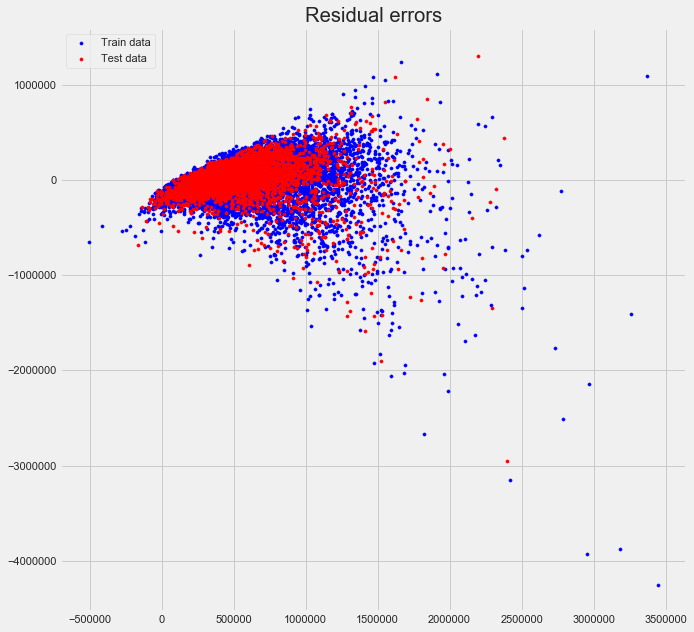

In [200]:
plt.style.use('fivethirtyeight')  
plt.subplots(figsize=(10,10))
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train,color = "blue", s = 10, label = 'Train data') 
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, color = "red", s = 10, label = 'Test data') 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
plt.legend(loc = 'upper left') 
plt.title("Residual errors") 
plt.show() 